In [1]:
import numpy as np
import scipy.optimize as opt
from scipy.io import loadmat
import functions as funcs
import re
%matplotlib inline

# Build a spam filter

In [2]:
data = loadmat('data/ex6data1.mat')
X, y = data['X'], data['y'][:, 0]

# Display data
plot positive and negative examples

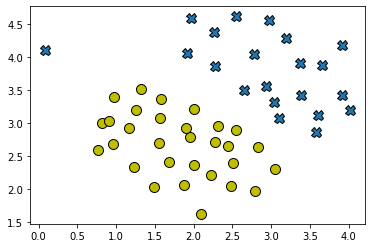

In [3]:
funcs.displayData(X,y)

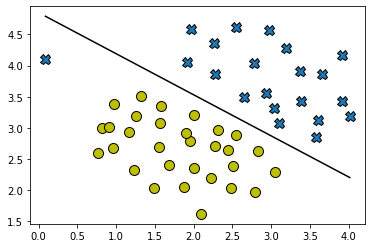

In [4]:
C = 1.0
clf = funcs.svmTrain(X,y,C)
funcs.displayData(X,y,clf=clf)

# Test Gaussian kernel
- I wont be using this since I'm using sklearn but its part of the exercise

In [5]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma=2
sim = funcs.gaussianKernel(x1,x2,sigma)
print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



# Non-linear data

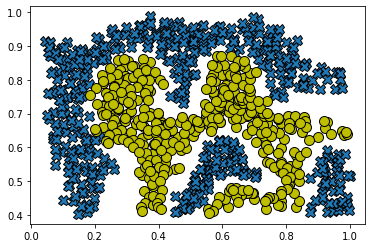

In [6]:
data2 = loadmat('data/ex6data2.mat')
X2, y2 = data2['X'], data2['y'][:,0]
funcs.displayData(X2, y2)

In [7]:
C = 1.0
clf2 = funcs.svmTrain(X2,y2,C, kernel = 'rbf')
funcs.displayData(X2, y2, clf=clf2)

ValueError: 'RBF' is not in list

In [16]:
clf2.kernel

'rbf'